In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Telco_Customer_Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There is no null values

In [6]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [8]:
# Checking how many values each categorical feature has
categorical_features=categorical_features.drop(['customerID','TotalCharges'])
for feature in categorical_features:
    print(f"{feature}: {df[feature].value_counts()}\n")

gender: gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup: OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection: DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport: TechSupport
No    

In [9]:
df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [10]:
# change TotalCharges data type from object to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [11]:
df["TotalCharges"].isnull().sum()

np.int64(11)

## after converting TotalCharges to float null values appered so we need to deal with them

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df[(df['tenure'] == 0) & (df['TotalCharges'].isnull())]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As it shows from the code above the customer with a TotalCharges null value has tenure = 0, which likely means they are a new customer who hasn't been billed yet.

it's logical that their TotalCharges is 0 so i will replace the nulls in TotalCharges with 0.

In [15]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0


In [16]:
df['TotalCharges'].isnull().sum()

np.int64(0)

## encoding categorical features

In [17]:
df.drop(['customerID'],axis=1,inplace=True)

In [18]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_features] = df[binary_features].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


<ipython-input-18-1f6a4ff72b77>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_features] = df[binary_features].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [19]:
for i in binary_features:
  print(df[i].value_counts())

gender
1    3555
0    3488
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
PhoneService
1    6361
0     682
Name: count, dtype: int64
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64


In [20]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [21]:
contract_order = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

df['Contract'] = df['Contract'].map(contract_order)
df['Contract'].value_counts()

,count
Contract,
0,3875
2,1695
1,1473


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [23]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaymentMethod'],
      dtype='object')


In [24]:
for feature in categorical_features:
    print(f"{feature}: {df[feature].value_counts()}\n")

MultipleLines: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup: OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection: DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport: TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV: StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMovies: StreamingMovies
No                

In [25]:
# One hot encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'PaymentMethod'], drop_first=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   Contract                               7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

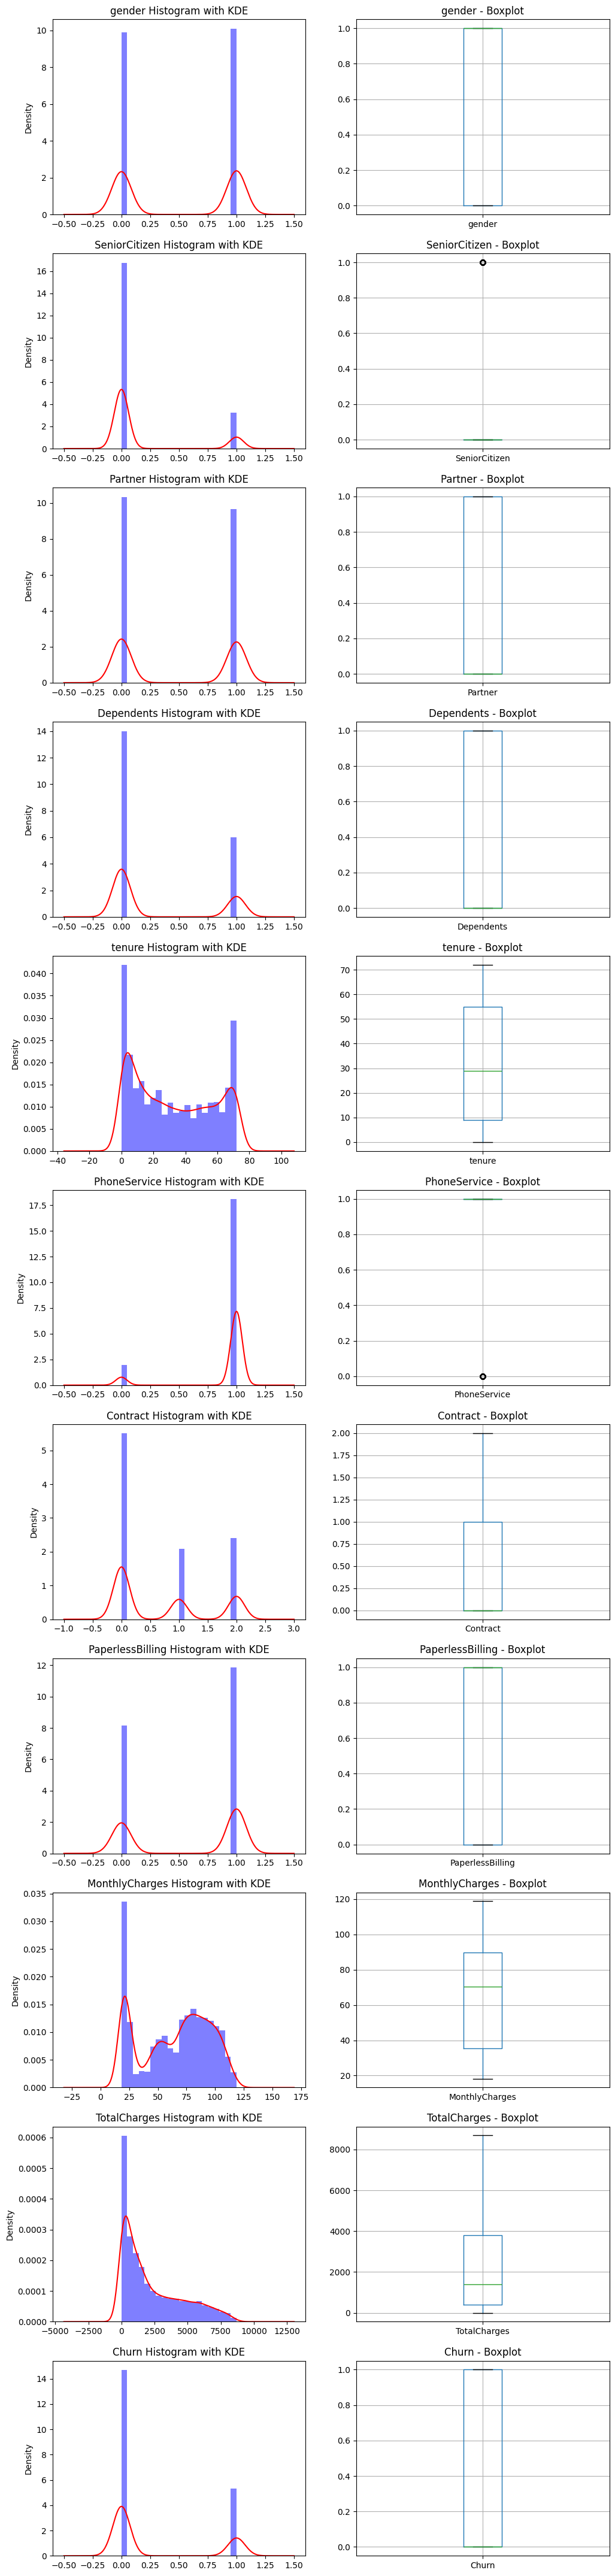

In [27]:
# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
c=df.select_dtypes(include=['int64','float64'])
fig, axes = plt.subplots(len(c.columns), 2, figsize=(12, 5 * len(c.columns)))

for i, col in enumerate(c.columns):
    try:
        df[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
        df[col].plot(kind='kde', ax=axes[i, 0], color='red')

        axes[i, 0].set_title(f'{col} Histogram with KDE')
        df.boxplot(column=col, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} - Boxplot')

    except IndexError:
      print(f"Error: Could not create plots for column '{col}'")
      break
    except Exception as e:
      print(f"An error occurred while plotting '{col}': {e}")
      continue

## as it shows from the box plots that continuous features dont have outliers

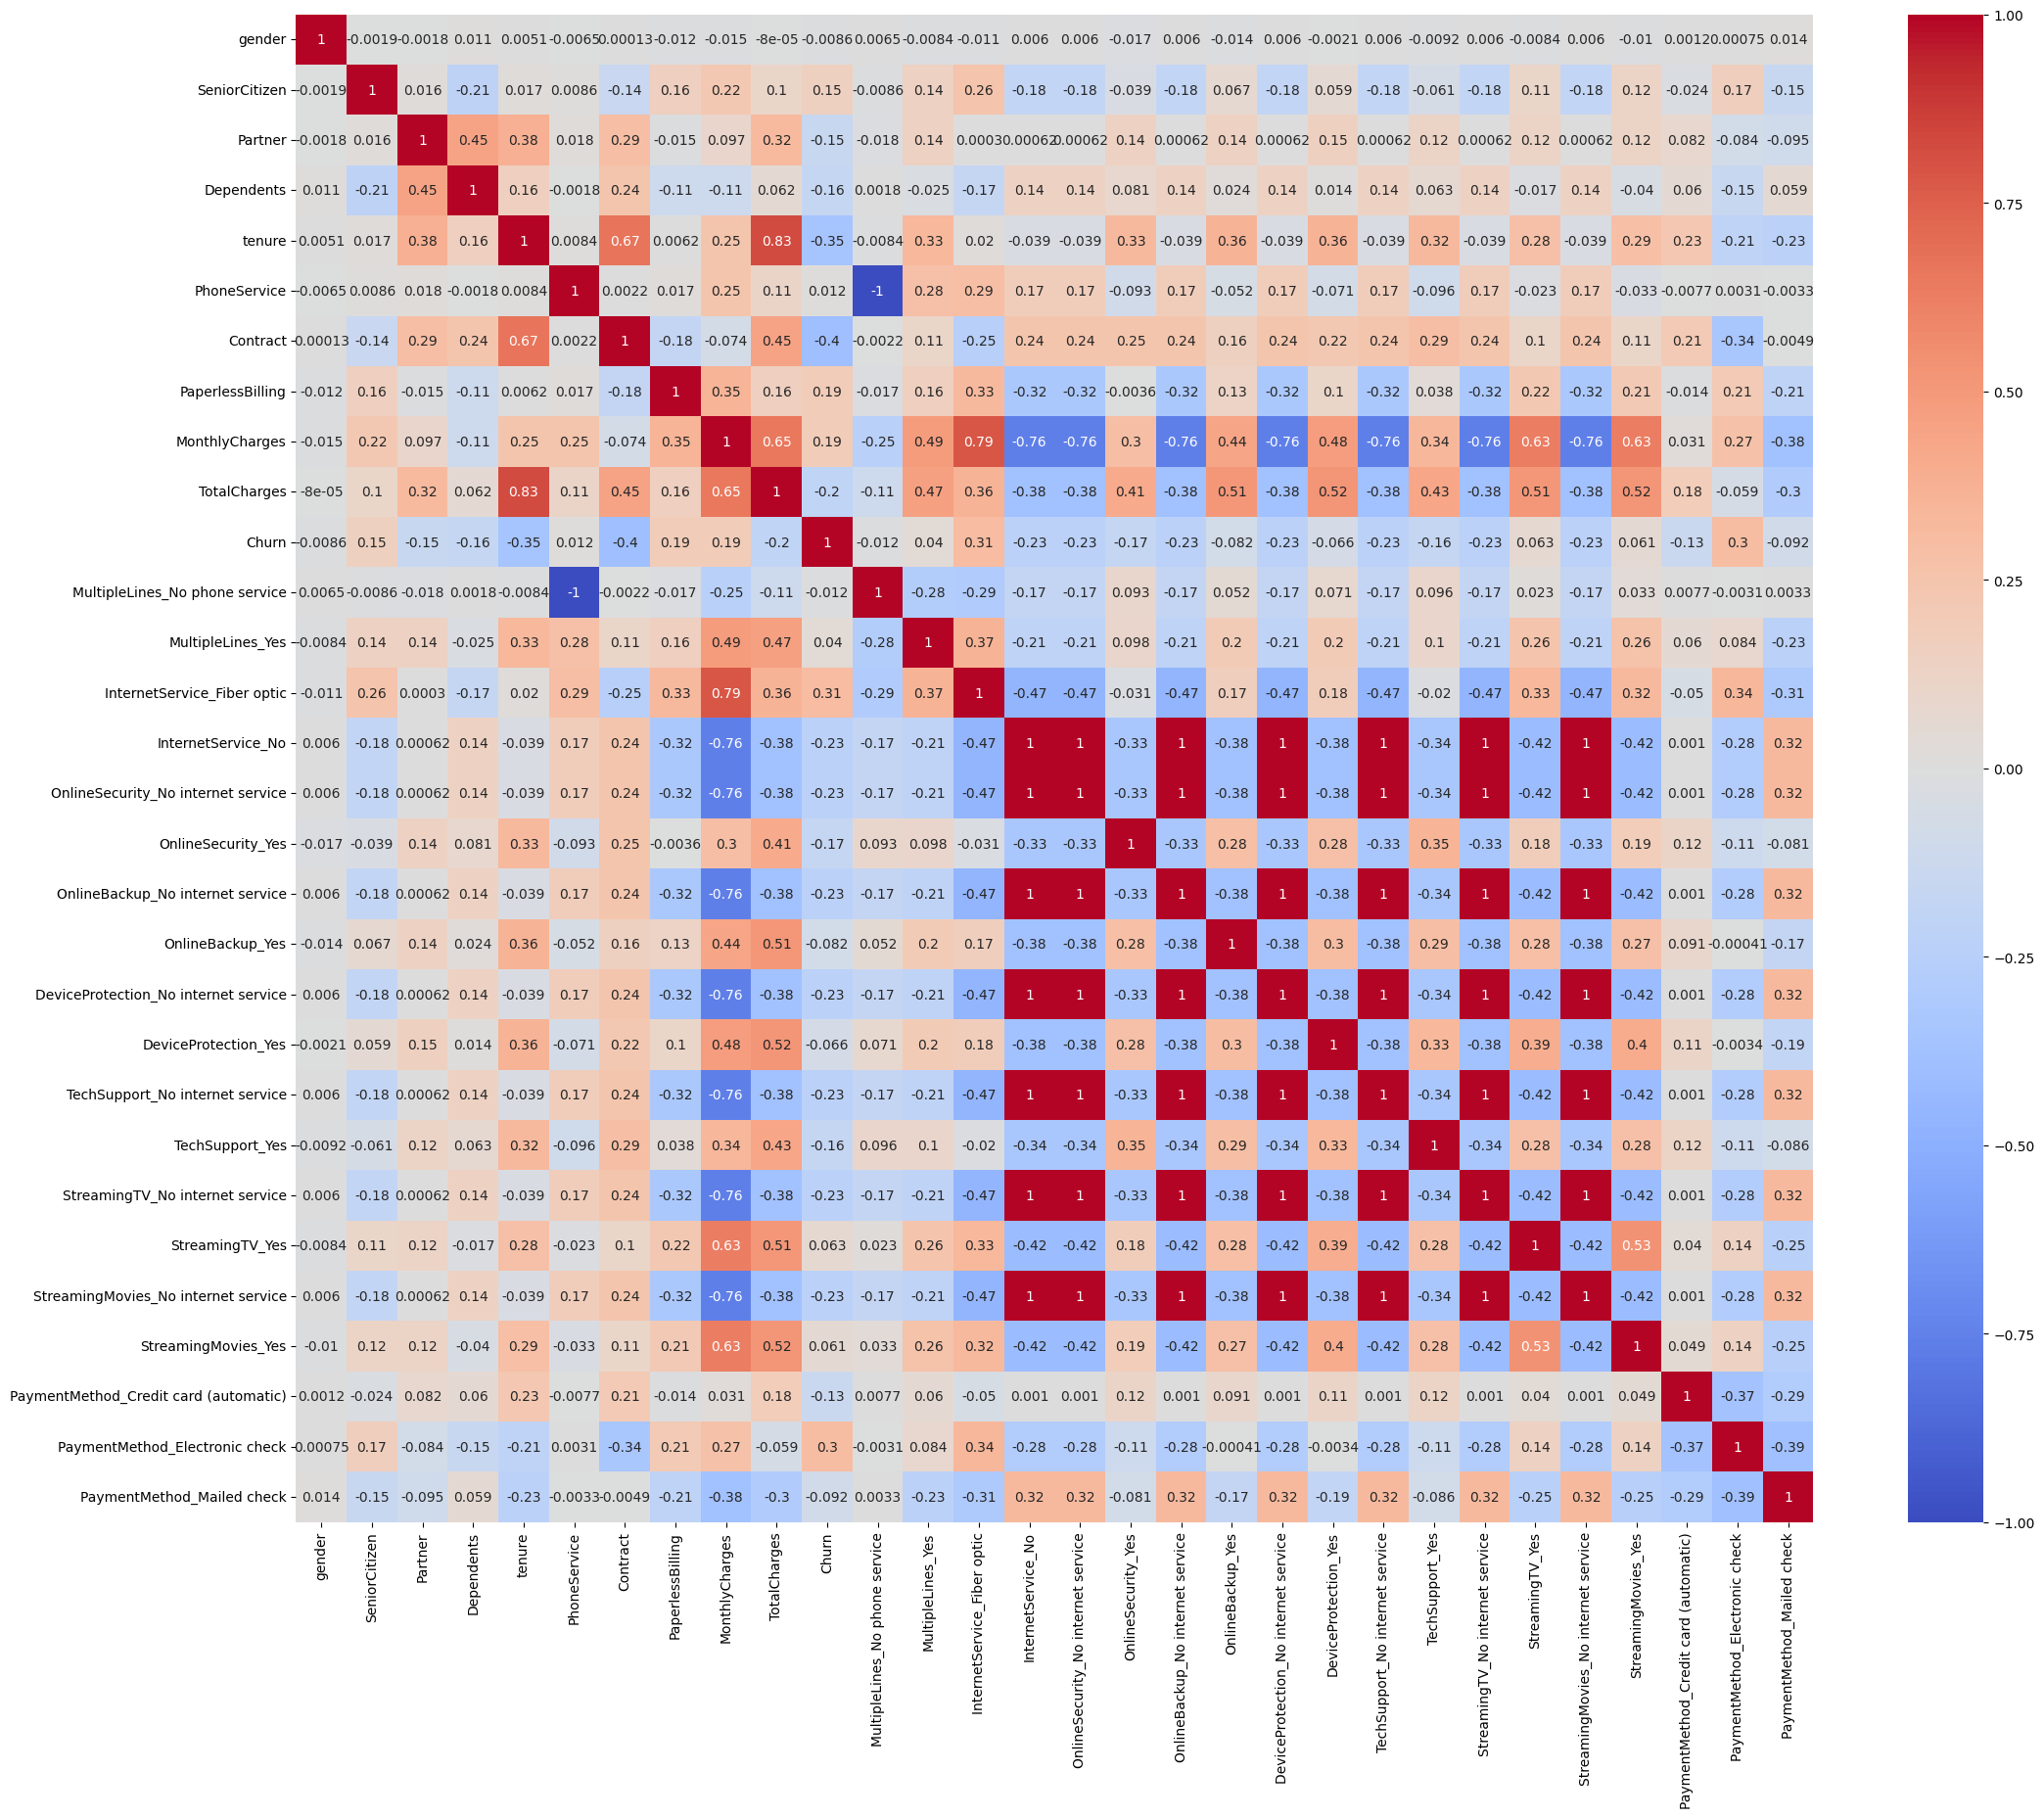

In [28]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()

## choosing the features that affects the target the most

In [29]:

# Compute correlation matrix
corr_matrix = df.corr()

# Sort by correlation with Churn
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print(corr_with_churn)


Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


TotalCharges                      0.194157
MonthlyCharges                    0.171021
tenure                            0.154338
Contract                          0.090848
PaymentMethod_Electronic check    0.034837
InternetService_Fiber optic       0.033602
gender                            0.027611
OnlineSecurity_Yes                0.025350
PaperlessBilling                  0.024389
TechSupport_Yes                   0.022681
Partner                           0.022556
OnlineBackup_Yes                  0.021169
SeniorCitizen                     0.020368
MultipleLines_Yes                 0.019422
Dependents                        0.018669
DeviceProtection_Yes              0.018376
dtype: float64


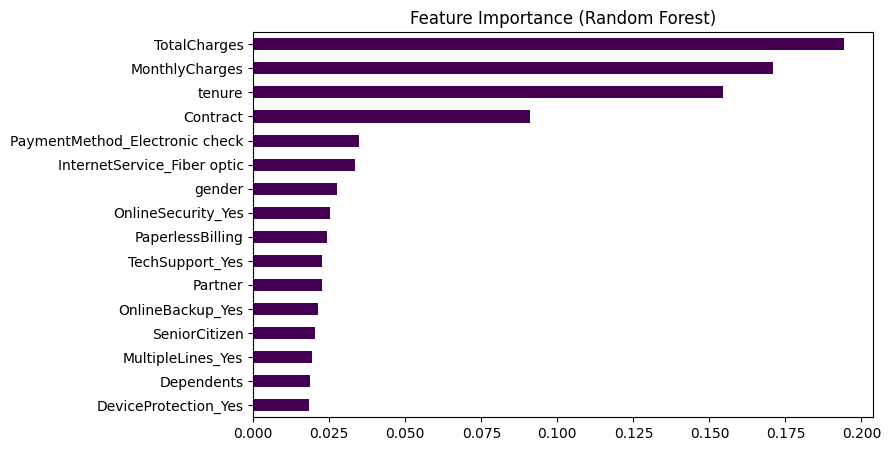

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df.drop(columns=['Churn'])  # Drop target column
y = df['Churn']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print top features
print(feature_importance.head(16))

# Plot feature importance
feature_importance.head(16).plot(kind='barh', figsize=(8,5), colormap='viridis')
plt.gca().invert_yaxis()  # Highest values on top
plt.title("Feature Importance (Random Forest)")
plt.show()


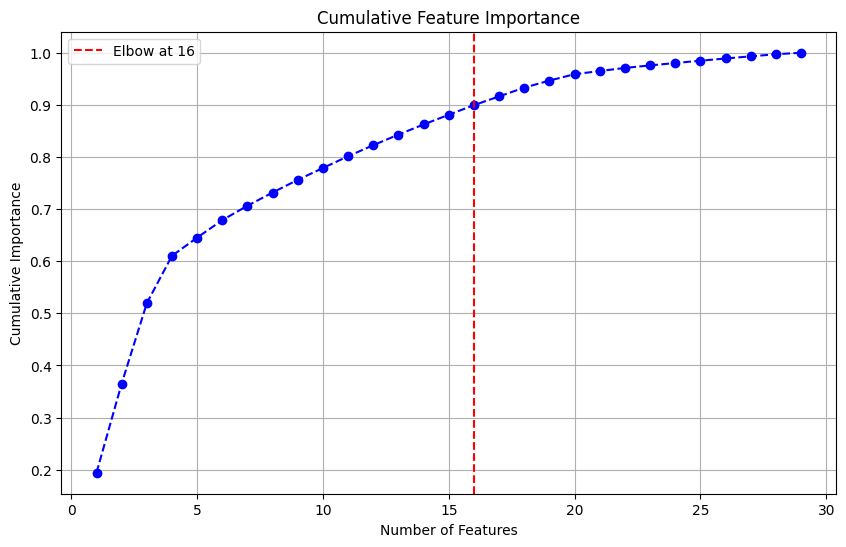

In [31]:
# elbow method
# Sort the importances in descending order and get the corresponding feature names
sorted_idx = np.argsort(model.feature_importances_)[::-1]
sorted_features = np.array(df)[sorted_idx]
sorted_importances = np.array(model.feature_importances_)[sorted_idx]

# Calculate cumulative sum of importances
cumulative_importance = np.cumsum(sorted_importances)

# Plot the cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), cumulative_importance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)

# Calculate the "elbow" point (using the maximum curvature method)
elbow_index = np.argmax(np.diff(cumulative_importance, 2)) + 1  # Add 1 to adjust for indexing

# Add a vertical line at the elbow
plt.axvline(x=elbow_index, color='r', linestyle='--', label=f'Elbow at {elbow_index}')
plt.legend()
plt.show()



# Training the model on the selected features

In [32]:
features=['TotalCharges','MonthlyCharges','tenure','Contract','PaymentMethod_Electronic check','InternetService_Fiber optic'
,'gender','OnlineSecurity_Yes','PaperlessBilling','TechSupport_Yes','Partner','OnlineBackup_Yes','SeniorCitizen','MultipleLines_Yes','Dependents'
,'DeviceProtection_Yes' ]

In [33]:
df_model=df[features]

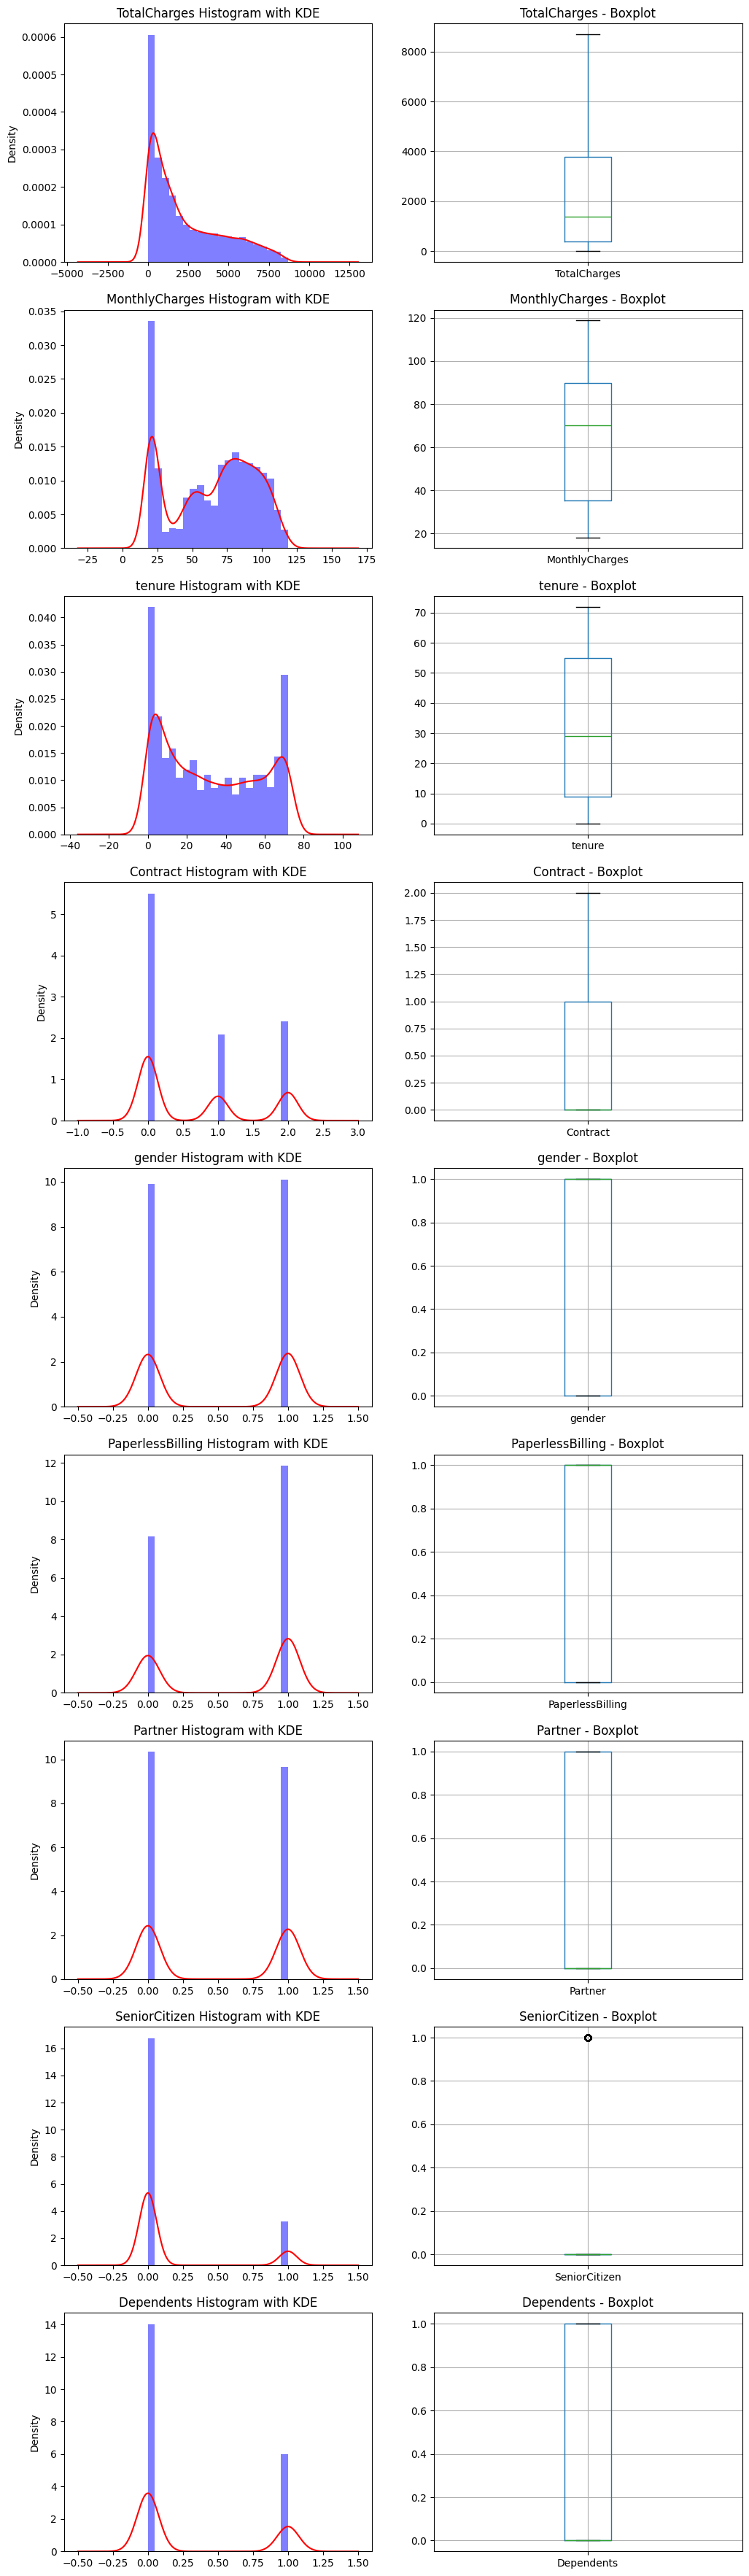

In [55]:
# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
c=df_model.select_dtypes(include=['int64','float64'])
fig, axes = plt.subplots(len(c.columns), 2, figsize=(12, 5 * len(c.columns)))

for i, col in enumerate(c.columns):
    try:
        df_model[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
        df_model[col].plot(kind='kde', ax=axes[i, 0], color='red')

        axes[i, 0].set_title(f'{col} Histogram with KDE')
        df_model.boxplot(column=col, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} - Boxplot')

    except IndexError:
      print(f"Error: Could not create plots for column '{col}'")
      break
    except Exception as e:
      print(f"An error occurred while plotting '{col}': {e}")
      continue

In [34]:
x=df_model
y=df['Churn']


In [35]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [36]:
# Over sampling data because the target churn is imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)


In [37]:

y.value_counts()

,count
Churn,
0,5174
1,5174


In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TotalCharges                    10348 non-null  float64
 1   MonthlyCharges                  10348 non-null  float64
 2   tenure                          10348 non-null  int64  
 3   Contract                        10348 non-null  int64  
 4   PaymentMethod_Electronic check  10348 non-null  bool   
 5   InternetService_Fiber optic     10348 non-null  bool   
 6   gender                          10348 non-null  int64  
 7   OnlineSecurity_Yes              10348 non-null  bool   
 8   PaperlessBilling                10348 non-null  int64  
 9   TechSupport_Yes                 10348 non-null  bool   
 10  Partner                         10348 non-null  int64  
 11  OnlineBackup_Yes                10348 non-null  bool   
 12  SeniorCitizen                   

In [64]:
continuous_features = ['TotalCharges', 'MonthlyCharges', 'tenure']
scaler = StandardScaler()

# Apply scaling only to selected features
x[continuous_features] = scaler.fit_transform(x[continuous_features])

In [65]:
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
n = 50
XGBoost_accuracy = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)


    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    XGBoost_accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy of XGBoost Classifier
print('Average accuracy of XGBoost Classifier:', np.mean(XGBoost_accuracy))

Average accuracy of XGBoost Classifier: 0.8339806763285025


In [66]:
# GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB
n = 50
G_accuracy = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)

    G = GaussianNB()
    G.fit(X_train, y_train)

    y_pred = G.predict(X_test)
    G_accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy of GaussianNB Classifier
print('Average accuracy of GaussianNB Classifier:', np.mean(G_accuracy))

Average accuracy of GaussianNB Classifier: 0.7856135265700483


In [61]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

n = 50
accuracy = []
# Select only the continuous features


for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)

    xgboost = GradientBoostingClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy of XGBoost Classifier
print('Average accuracy of GradientBoostingClassifier:', np.mean(accuracy))

Average accuracy of GradientBoostingClassifier: 0.8214975845410628


In [68]:
# Hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

gb_model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.8}
Accuracy: 0.8434782608695652
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1553
           1       0.82      0.87      0.85      1552

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),  # Tree depth
    'subsample': uniform(0.7, 0.3),  # Fraction of samples per tree
    'min_samples_split': randint(2, 10),  # Minimum samples per split
    'min_samples_leaf': randint(1, 10)  # Minimum samples per leaf
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    gb_model, param_distributions=param_dist,
    n_iter=50, scoring='accuracy', cv=5,
    n_jobs=-1, verbose=2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'learning_rate': np.float64(0.06364681276639864), 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 177, 'subsample': np.float64(0.8704925810006414)}


In [70]:
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8438003220611916
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1553
           1       0.82      0.88      0.85      1552

    accuracy                           0.84      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.84      0.84      3105



In [71]:
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the XGBClassifier model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 15),  # Tree depth
    'subsample': uniform(0.5, 0.5),  # Fraction of samples per tree
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features per tree
    'gamma': uniform(0, 0.5),  # Minimum loss reduction required for a split
    'reg_alpha': uniform(0, 1),  # L1 regularization
    'reg_lambda': uniform(0, 1)  # L2 regularization
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    n_iter=50, scoring='accuracy', cv=5,
    n_jobs=-1, verbose=2, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:50:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': np.float64(0.7611216300274022), 'gamma': np.float64(0.3849967765493054), 'learning_rate': np.float64(0.07474630824905294), 'max_depth': 7, 'n_estimators': 152, 'reg_alpha': np.float64(0.085347464993768), 'reg_lambda': np.float64(0.0516817211686077), 'subsample': np.float64(0.7656773157840739)}
Accuracy: 0.8415458937198068
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1553
           1       0.82      0.88      0.85      1552

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105

